<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/10_keras_cv_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Step 1: Imports
import tensorflow as tf
import keras_cv
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [12]:
# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [13]:
# Step 3: Define Augmentation Pipeline using keras_cv
augmentation = keras_cv.layers.Augmenter([
    keras_cv.layers.RandomFlip(mode="horizontal"),
    keras_cv.layers.RandomRotation(factor=0.1),
    keras_cv.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    keras_cv.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    keras_cv.layers.RandomBrightness(factor=0.2),
])

In [15]:
# Step 4: Create tf.data Pipeline
BATCH_SIZE = 64
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_cat))
train_ds = train_ds.shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_ds_aug = train_ds.map(lambda x, y: (augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)


In [16]:
# Step 5: Define Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Step 6: Train Model
history = model.fit(train_ds_aug, validation_data=(x_test, y_test_cat), epochs=10, verbose=0)

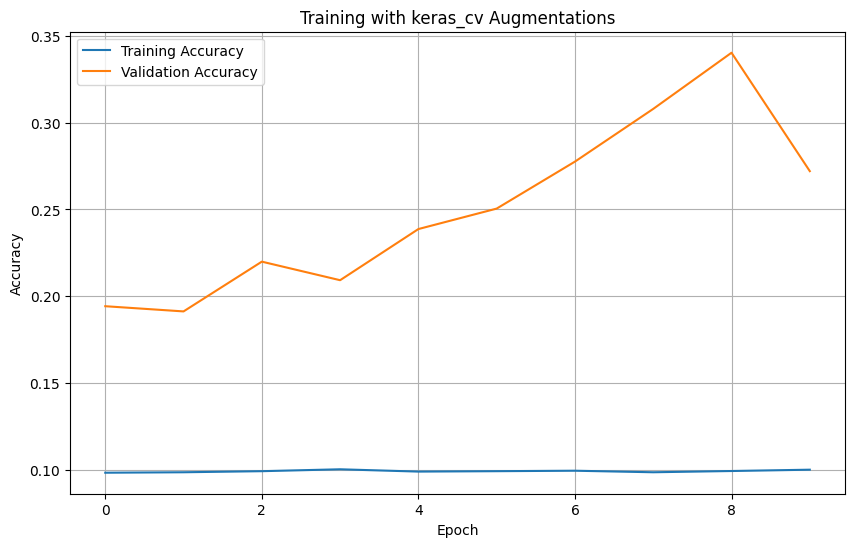

In [18]:
# Step 7: Plot Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training with keras_cv Augmentations")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()